# 1. 문제정의
- 붓꽃의 3가지 품종을 구분해보자, 분류실습!

# 2. 데이터 수집
- scikit-learn 에서 제공하는 데이터셋
- scikit-learn : 머신러닝 기능들이 모여있는 라이브러리

In [9]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [10]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# O data : 사용할 데이터의 값만 적혀있음
# O target : 정답 데이터, 3가지 품종이 숫자로 적혀있음
# frame : 형식을 유지하기 위해 남아있음
# o target_names : 정답 데이터 숫자의 의미 차례대로 0,1,2
# DESCR : 데이터의 자세한 설명
# o feature_names : 사용할 값의 컬럼 이름, sepal : 꽃받침, 
#                  petal : 꽃잎, length : 세로, width: 가로
# filename : 값을 파일로 가지고 있고 , 해당하는 파일의 이름
# data_module : 파일이 위치한 폴더 경로
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 3. 데이터 전처리
- data, target, target_names, feature_names 를 보기 좋게 정리
- 이상치, 결측치 확인

In [12]:
import pandas as pd
X = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = iris_data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# 0 : setosa, 1 : versicolo, 2 : virgica
iris_data['target']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
#결측치 확인하기
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
# 이상치 확인하기
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4. 탐색적 데이터 분석

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

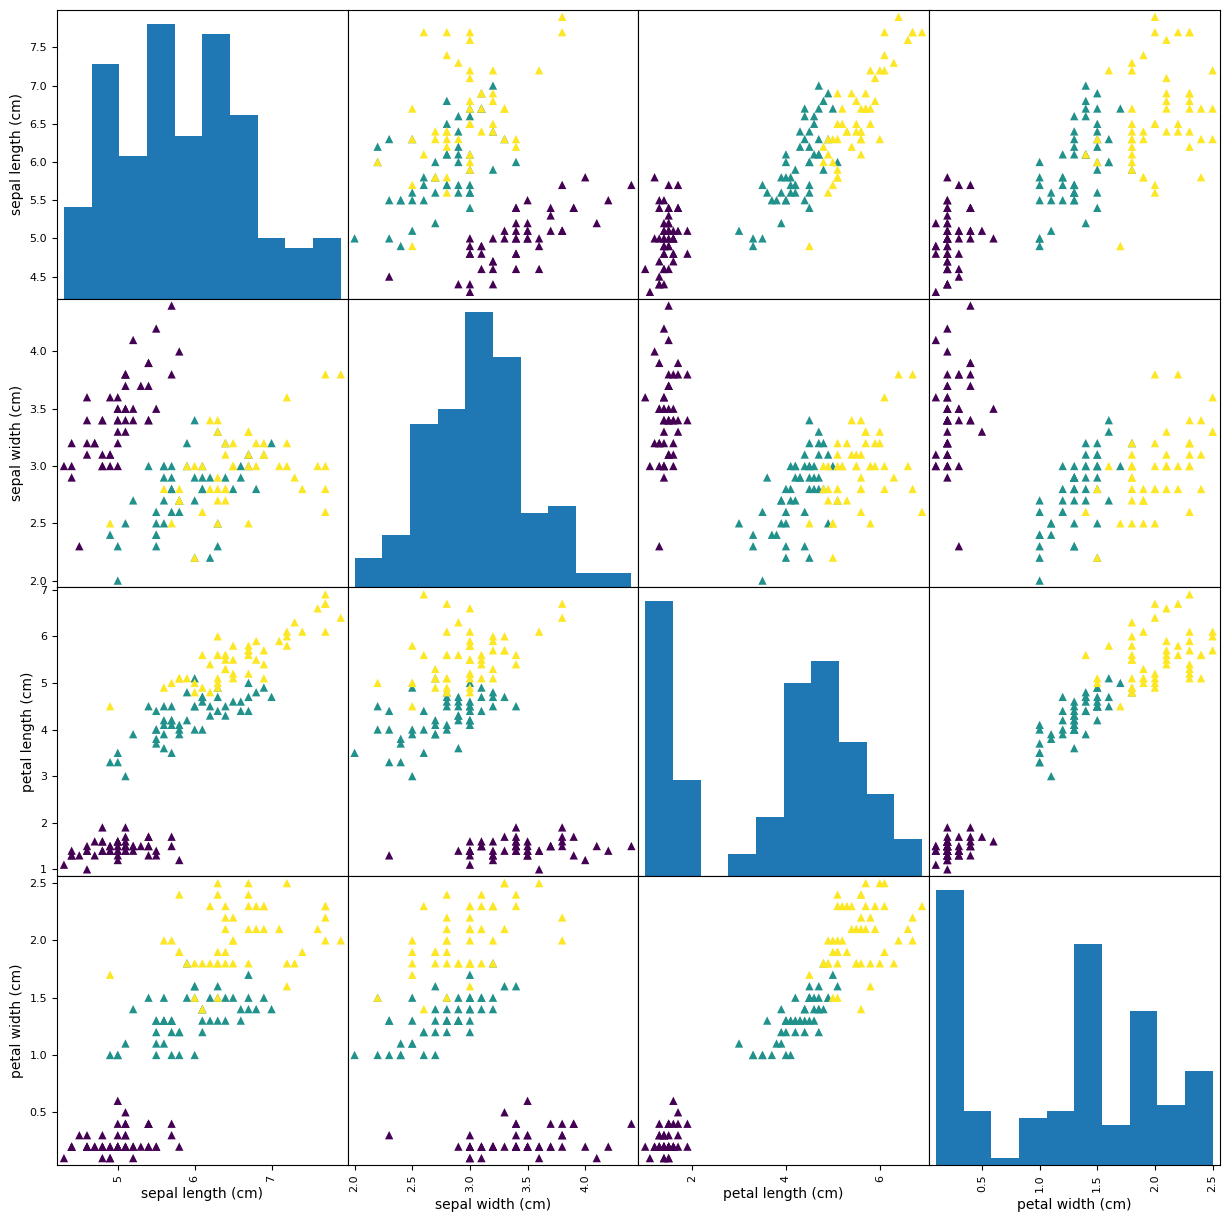

In [17]:
# pandas 내부에 있는 그래프 그리는 기능
pd.plotting.scatter_matrix(X,
                          figsize=(15,15),
                          marker='^',
                          c=y,
                          alpha = 1)

# 5. 모델 선택 및 하이퍼 파라미터 튜닝
- train 과 test 데이터 분리하기, 3/4 단계에선 데이터의 변형이 일어남
- > 5단계는 데이터 변형 완료 후
- knn 모델 사용
- n_neighbors(이웃의 수), weights(이웃의 중요도),p(거리 계산 방식)

In [18]:
# train(7)과 test(3) 분리하기
#   105        45
# 만약 데이터가 너무 없다 = 학습이 잘 안됨 > train 비율 증가
# 만약 데이터가 충분히 많다 = 학습이 잘 된다 > test 비율 증가 
#                                          > 여러데이터로 평가 해보면서 평가 점수 신뢰도 상승

In [19]:
# train 과 test 로 데이터를 나눌때 데이터를 섞어주어야함
# > 한곳으로 데이터가 몰리는 것을 방지 
from sklearn.model_selection import train_test_split
# 4가지 결과를 순서대로 출력
# 데이터를 섞는 기능이 들어가 있음
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                   random_state = 6)
#random_state : 난수를 특정 값으로 고정한다

In [20]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
# 하이퍼 파라미터 튜닝
knn = KNeighborsClassifier(n_neighbors=7, p = 2, weights='distance')

# 6. 학습

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

# 7.평가 및 예측

In [22]:
# 100 점 = 모든걸 맞출수 있는 규칙이 있다.
# 100점은 보통 오류가 있거나, 머신러닝을 할 필요가 없는 문제
# 평가(정확도를 기준으로 계산, 정확도 = 맞춘 개수/전체 개수)

print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

1.0
0.9777777777777777


In [23]:
# 예측
knn.predict([[5,4,3,2.0]])

c:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
# 하이퍼 파라미터 튜닝 해보면서 일반화 / 과대집합 / 과소집합 판단해보기

In [25]:
# 하이퍼 파라미터 튜닝
# 이웃의 숫자 = n_neighbors

# n_neighbors 의 값을 변경해가면서 달라지는 결과 지정할 변수
train_score = []
test_score = []
for n in range(1,30): #n_neighbors 를 1~29까지 바꿔가며 결과 확인하기
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test,y_test))

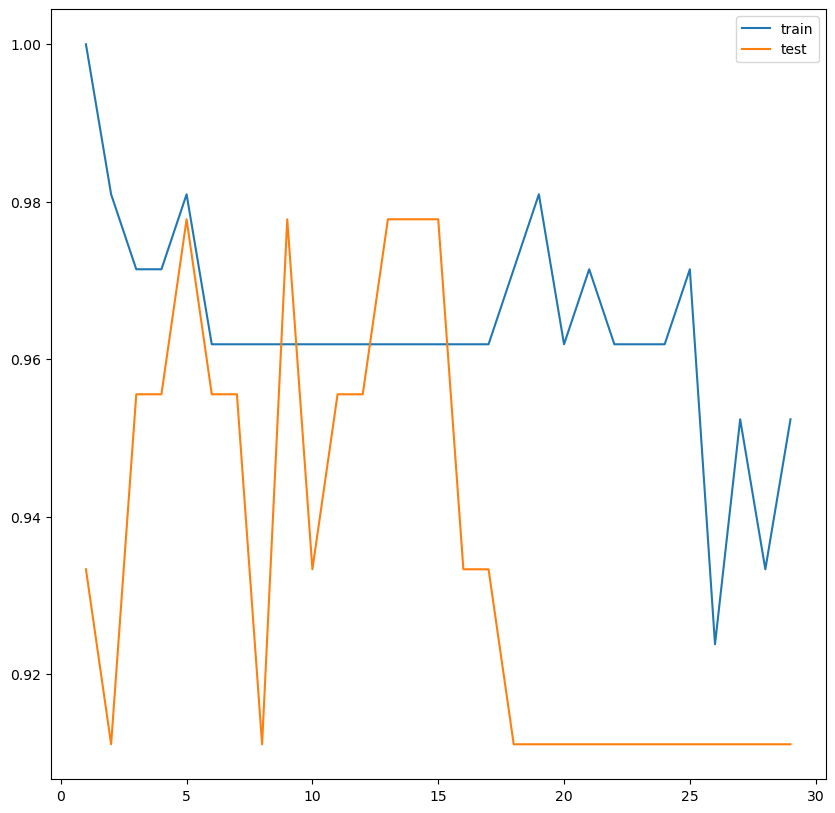

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10)) # 그래프 크기 조절
plt.plot(range(1,30), train_score, label = 'train')
plt.plot(range(1,30), test_score, label = 'test')
plt.legend() # label 그래프에 표시
plt.show()
# 이웃이 5보다 작을때 = 과대적합
# 이웃이 5일때가 학습이 가장 잘 된 결과 = 일반화가 잘 되었다
# 이웃이 5보다 클때 = 과소적합